# Trabalhando com dados e modelos de IA

## Instruções:

Dados do Kaggle de domínio automativo.

## Objetivo: 

Aplicar uma técnica de Regressão e/ou de Classificação.

In [3]:
#Importando as tabelas básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dados = pd.read_csv(r'C:\Users\ysora\Downloads\Car_sales.csv') #Atribuindo os dados à uma varíavel

In [5]:
dados.describe() #Estatísticas básicas

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [6]:
dados.info() #Informações dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [8]:
#Retirando colunas desnecessárias
dados_modificados = dados.drop(['Model', 'Latest_Launch'], axis = 1)
dados_modificados

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,Acura,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,Acura,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,Acura,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,Acura,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,Audi,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812
153,Volvo,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495
154,Volvo,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978
155,Volvo,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357


In [9]:
#Retirando as linhas onde não há valor na coluna Price_in_thousands
dados_novo = dados_modificados[dados_modificados['Price_in_thousands'].notna()]
dados_novo

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,Acura,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,Acura,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
3,Acura,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,Audi,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
5,Audi,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812
153,Volvo,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495
154,Volvo,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978
155,Volvo,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357


In [10]:
#Substituindo os valores vazios das colunas __year_resale_value, Fuel_efficiency, Power_perf_factor com suas medianas
dados_novo['__year_resale_value'].fillna(value = dados_novo['__year_resale_value'].median(), inplace = True)
dados_novo['Fuel_efficiency'].fillna(value = dados_novo['Fuel_efficiency'].median(), inplace = True)
dados_novo['Power_perf_factor'].fillna(value = dados_novo['Power_perf_factor'].median(), inplace = True)
dados_novo

C:\Users\ysora\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,Acura,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,Acura,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
3,Acura,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,Audi,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
5,Audi,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,3.545,14.010,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812
153,Volvo,15.245,14.010,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495
154,Volvo,17.531,14.010,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978
155,Volvo,3.493,14.010,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357


In [11]:
dados_novo.info() #Informações dos dados

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 156
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         155 non-null    object 
 1   Sales_in_thousands   155 non-null    float64
 2   __year_resale_value  155 non-null    float64
 3   Vehicle_type         155 non-null    object 
 4   Price_in_thousands   155 non-null    float64
 5   Engine_size          155 non-null    float64
 6   Horsepower           155 non-null    float64
 7   Wheelbase            155 non-null    float64
 8   Width                155 non-null    float64
 9   Length               155 non-null    float64
 10  Curb_weight          154 non-null    float64
 11  Fuel_capacity        155 non-null    float64
 12  Fuel_efficiency      155 non-null    float64
 13  Power_perf_factor    155 non-null    float64
dtypes: float64(12), object(2)
memory usage: 18.2+ KB


In [12]:
#Substituindo os valores vazios da coluna Curb_weight com sua media
dados_novo['Curb_weight'].fillna(value = dados_novo['Curb_weight'].mean(), inplace = True)
dados_novo

C:\Users\ysora\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,Acura,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,Acura,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
3,Acura,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,Audi,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
5,Audi,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,3.545,14.010,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812
153,Volvo,15.245,14.010,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495
154,Volvo,17.531,14.010,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978
155,Volvo,3.493,14.010,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357


In [13]:
dados_novo.info() #Informações dos dados

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 156
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         155 non-null    object 
 1   Sales_in_thousands   155 non-null    float64
 2   __year_resale_value  155 non-null    float64
 3   Vehicle_type         155 non-null    object 
 4   Price_in_thousands   155 non-null    float64
 5   Engine_size          155 non-null    float64
 6   Horsepower           155 non-null    float64
 7   Wheelbase            155 non-null    float64
 8   Width                155 non-null    float64
 9   Length               155 non-null    float64
 10  Curb_weight          155 non-null    float64
 11  Fuel_capacity        155 non-null    float64
 12  Fuel_efficiency      155 non-null    float64
 13  Power_perf_factor    155 non-null    float64
dtypes: float64(12), object(2)
memory usage: 18.2+ KB


In [14]:
#Retirando mais colunas desnecessárias
dados_finais = dados_novo.drop(['__year_resale_value', 'Engine_size', 'Wheelbase', 'Length', 
                                     'Fuel_capacity', 'Power_perf_factor'], axis = 1)
dados_finais

,Manufacturer,Sales_in_thousands,Vehicle_type,Price_in_thousands,Horsepower,Width,Curb_weight,Fuel_efficiency
0,Acura,16.919,Passenger,21.50,140.0,67.3,2.639,28.0
1,Acura,39.384,Passenger,28.40,225.0,70.3,3.517,25.0
3,Acura,8.588,Passenger,42.00,210.0,71.4,3.850,22.0
4,Audi,20.397,Passenger,23.99,150.0,68.2,2.998,27.0
5,Audi,18.780,Passenger,33.95,200.0,76.1,3.561,22.0
...,...,...,...,...,...,...,...,...
152,Volvo,3.545,Passenger,24.40,160.0,67.6,3.042,25.0
153,Volvo,15.245,Passenger,27.50,168.0,69.3,3.208,25.0
154,Volvo,17.531,Passenger,28.80,168.0,69.3,3.259,25.0
155,Volvo,3.493,Passenger,45.50,236.0,71.5,3.601,23.0


In [15]:
#Criando uma contagem para saber quantos modelos de carros são produzidos por cada fabricante e ordanando-os
contagem_fabricante = dict()
for cada_fabricante in list(dados_finais['Manufacturer']):
    if cada_fabricante not in contagem_fabricante:
        contagem_fabricante[cada_fabricante] = 1
    else:
        contagem_fabricante[cada_fabricante] += 1
fabricantes_ordenados = dict(sorted(contagem_fabricante.items(), key = lambda item : item[1], reverse = True))

In [16]:
#Transformando a coluna Manufacturer em classes numerais.
#O fabricante que tiver a média de vendas maior que 75, ele pertence ao grupo 2, se não, grupo 1
manufacturers = []
for cada_fabricante in dados_finais['Manufacturer']:
    if fabricantes_ordenados[cada_fabricante] > 75:
        manufacturers.append(2)
    else:
        manufacturers.append(1)
dados_finais['Manufacturer'] = manufacturers
dados_finais

,Manufacturer,Sales_in_thousands,Vehicle_type,Price_in_thousands,Horsepower,Width,Curb_weight,Fuel_efficiency
0,1,16.919,Passenger,21.50,140.0,67.3,2.639,28.0
1,1,39.384,Passenger,28.40,225.0,70.3,3.517,25.0
3,1,8.588,Passenger,42.00,210.0,71.4,3.850,22.0
4,1,20.397,Passenger,23.99,150.0,68.2,2.998,27.0
5,1,18.780,Passenger,33.95,200.0,76.1,3.561,22.0
...,...,...,...,...,...,...,...,...
152,1,3.545,Passenger,24.40,160.0,67.6,3.042,25.0
153,1,15.245,Passenger,27.50,168.0,69.3,3.208,25.0
154,1,17.531,Passenger,28.80,168.0,69.3,3.259,25.0
155,1,3.493,Passenger,45.50,236.0,71.5,3.601,23.0


In [17]:
#Função para tranformar a coluna Vehicle_type em 0 e 1.
def converte_tipo_veiculo(tipo_veiculo):
    if tipo_veiculo == 'Passenger':
        return 0
    else:
        return 1

In [19]:
dados_finais['Vehicle_type'] = dados_finais['Vehicle_type'].apply(converte_tipo_veiculo)

In [20]:
dados_finais

,Manufacturer,Sales_in_thousands,Vehicle_type,Price_in_thousands,Horsepower,Width,Curb_weight,Fuel_efficiency
0,1,16.919,0,21.50,140.0,67.3,2.639,28.0
1,1,39.384,0,28.40,225.0,70.3,3.517,25.0
3,1,8.588,0,42.00,210.0,71.4,3.850,22.0
4,1,20.397,0,23.99,150.0,68.2,2.998,27.0
5,1,18.780,0,33.95,200.0,76.1,3.561,22.0
...,...,...,...,...,...,...,...,...
152,1,3.545,0,24.40,160.0,67.6,3.042,25.0
153,1,15.245,0,27.50,168.0,69.3,3.208,25.0
154,1,17.531,0,28.80,168.0,69.3,3.259,25.0
155,1,3.493,0,45.50,236.0,71.5,3.601,23.0


In [1]:
# Matriz de Correlação
plt.figure(figsize=(10,6))
sns.heatmap(dados_finais.corr(), annot=True, fmt=".1f");

NameError: name 'plt' is not defined

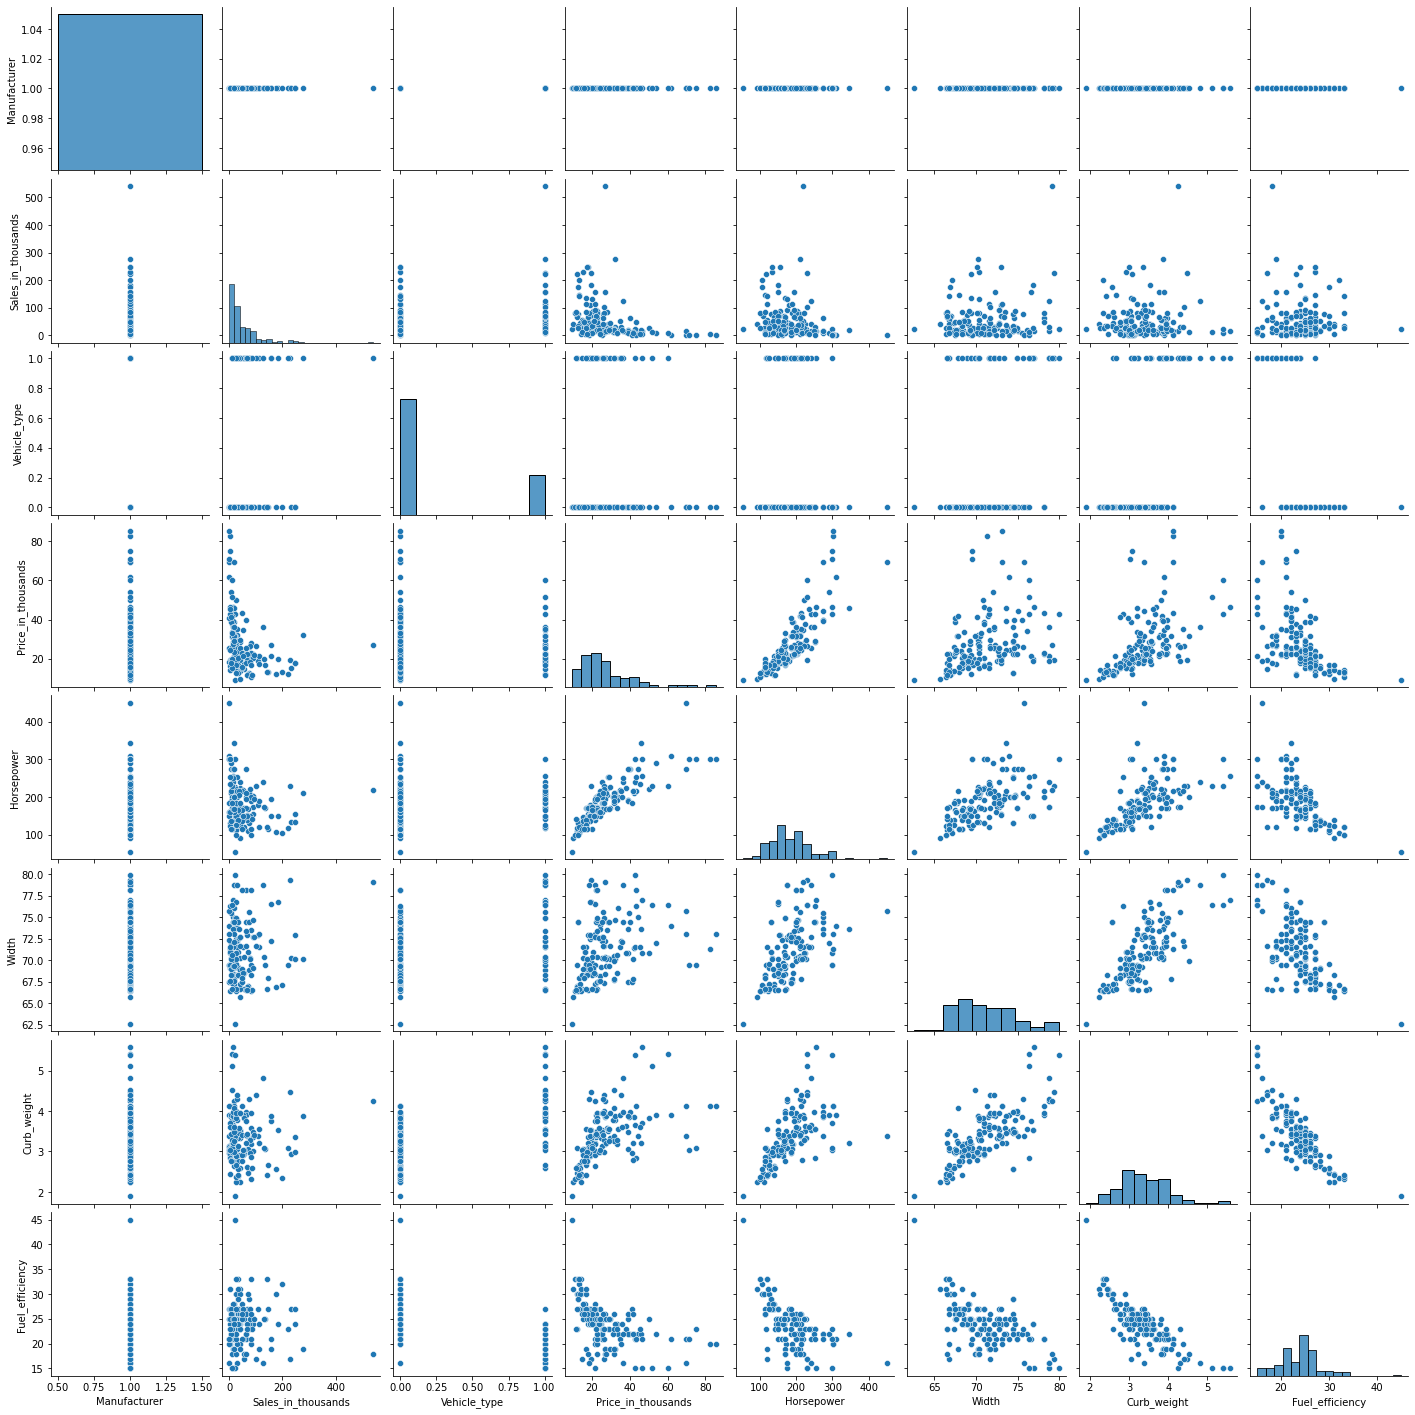

In [45]:
#Gráfico de disperção
sns.pairplot(dados_finais)

In [ ]:
#Importando a biblioteca para separar os dados de teste e treino.
from sklearn.model_selection import train_test_split

In [21]:
# Escolhendo as colunas preditivas e alvo
x = dados_finais.drop(columns = ['Price_in_thousands']) # Colunas descritivas
y = dados_finais['Price_in_thousands'] # Valor alvo

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [23]:
#Importando a biblioteca com o algorítmo de aprendizado de máquina. 
from sklearn.ensemble import RandomForestRegressor

In [34]:
rfr = RandomForestRegressor() # Criamos o objeto do regressor (não mudamos nenhum hiperpârametro)
rfr.fit(x_train,y_train)      # Treinamos o regressor passando apenas o conjunto de dados de treinamento 

RandomForestRegressor()

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

In [35]:
y_predicoes = rfr.predict(x_test)
R2 = r2_score(y_true = y_test,      # Gabarito
              y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('R2_LR: ', R2)  # Quanto mais próximos de 1 melhor

MAE = mean_absolute_error(y_true = y_test,      # Gabarito
                          y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('MAE_LR: ', MAE)

MSE = mean_squared_error(y_true = y_test,      # Gabarito
                         y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('MSE_LR: ', MSE)

R2_LR:  0.8082866148737956
MAE_LR:  3.9579561290322585
MSE_LR:  41.21169159015478


# Conclusões

Utilizando um banco de dados do https://www.kaggle.com que contém dados sobre Vendas de Carros, fizerá-se os devidos tratamentos dos dados e aplicado um algorítmo de aprendizado de máquina, o Random Forest Regressor. Com isso, obtemos 80% de acurácia ao predizer os Preços do carros de acordo com tipo do veículo, potência, fabricante etc.